**How to Use**

First, you need to load the pyemcee library, and define your function. For example: 

In [1]:
import pyemcee
import numpy as np

def myfunc21(input1):
   result1 = np.sum(input1)
   result2 = input1[1] ** input1[0]
   return [result1, result2]

Then, specify the upper and lower uncertainties of the prior parameters:

In [2]:
input1 = np.array([1., 2.])
input1_err = np.array([0.2, 0.5])
input1_err_p = input1_err
input1_err_m = -input1_err
output1 = myfunc21(input1)
output1_num = len(output1)

Choose the appropriate uncertainty distribution. For example, for a uniform distribution, use_gaussian=0, and for a Gaussian distribution, use_gaussian=1. Then, specify the number of walkers and the number of iterations, e.g. walk_num=30 and iteration_num=100. ou can then create the MCMC sample and propagate the uncertainties of the input parameters into your defined functions as follows::

In [3]:
use_gaussian=0 # uniform distribution from min value to max value
walk_num=30 # number of walkers
iteration_num=100 # number of samplers
mcmc_sim = pyemcee.hammer(myfunc21, input1, input1_err_m, input1_err_p, 
                          output1, walk_num, iteration_num, 
                          use_gaussian, print_progress=1)

Progress: 100% 



To determine the upper and lower errors of the function outputs, you need to run with the chosen appropriate confidence level. For example, a 1.645-sigma standard deviation can be specified with clevel=0.90. For a 1-sigma standard deviation, we have clevel=0.682:

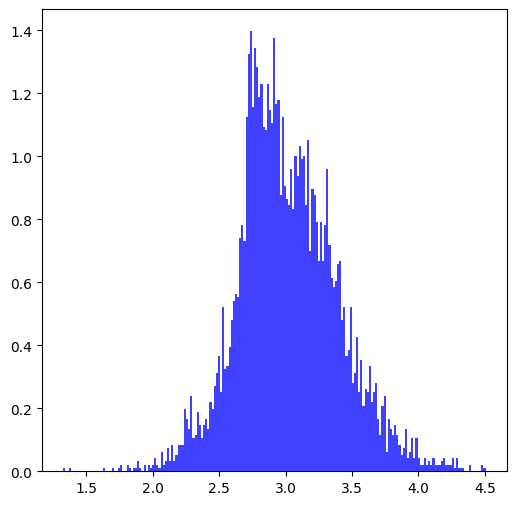

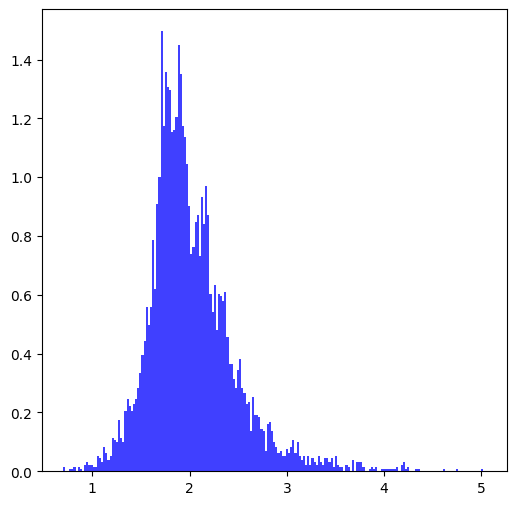

In [4]:
clevel=0.68268949 # 1-sigma
output1_error = pyemcee.find_errors(output1, mcmc_sim, clevel, do_plot=1)

To prevent plotting, you should set do_plot=None. To print the results:

In [5]:
for i in range(0, output1_num):
   print(output1[i], output1_error[i,:])

3.0 [-0.31710491  0.37039269]
2.0 [-0.34198337  0.37857234]


Now defined a function having two arguments:

In [6]:
def myfunc22(input1, functargs=None):
   result1 = functargs['scale1']*np.sum(input1)
   result2 = functargs['scale2']*input1[1] ** input1[0]
   return [result1, result2]

fcnargs = {'scale1':0.0, 'scale2':0.0}
input1 = np.array([1., 2.])
input1_err = np.array([0.2, 0.5])
input1_err_p = input1_err
input1_err_m = -input1_err
scale1=2.
scale2=3.
#fcnargs = fcnStruct(scale1, scale2)
fcnargs['scale1']=scale1
fcnargs['scale2']=scale2
output1 = myfunc22(input1, functargs=fcnargs)
output1_num = len(output1)

In [7]:
use_gaussian=0 # uniform distribution from min value to max value
walk_num=30 # number of walkers
iteration_num=100 # number of samplers
mcmc_sim = pyemcee.hammer(myfunc22, input1, input1_err_m, input1_err_p, 
                          output1, walk_num, iteration_num, 
                          use_gaussian, print_progress=1, functargs=fcnargs)

Progress: 100% 



In [8]:
output1_error = pyemcee.find_errors(output1, mcmc_sim, clevel)

In [9]:
for i in range(0, output1_num):
   print(output1[i], output1_error[i,:])

6.0 [-0.87131245  0.8385104 ]
6.0 [-1.36297413  1.47110334]
